# Data Preprocessing

In [1]:
#import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
#set column names for dataset

column_names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [3]:
#set drug names and feature names in a list (to be referenced ahead)

dependent_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking']
drug_names = ['Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [4]:
#load dataset in dataframe

drug_data = pd.read_csv('/Users/shubhamkulkarni/shubham/Machine Learning Assignment/drug_consumption.data', header = None, names = column_names)
drug_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
#check NaN in data (as per result none of the columns have NaN values)

print(drug_data.isna().sum())

ID                   0
Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
Sensation_seeking    0
Alcohol              0
Amphetamine          0
Amyl_nitrite         0
Benzodiazepine       0
Caffeine             0
Cannabis             0
Chocolate            0
Cocaine              0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
Legal_highs          0
LSD                  0
Methadone            0
Mushrooms            0
Nicotine             0
Semeron              0
VSA                  0
dtype: int64


In [6]:
#Check Unique values for each feature
drug_data.nunique()

ID                   1885
Age                     6
Gender                  2
Education               9
Country                 7
Ethnicity               7
Neuroticism            49
Extraversion           42
Openness               35
Agreeableness          41
Conscientiousness      41
Impulsiveness          10
Sensation_seeking      11
Alcohol                 7
Amphetamine             7
Amyl_nitrite            7
Benzodiazepine          7
Caffeine                7
Cannabis                7
Chocolate               7
Cocaine                 7
Crack                   7
Ecstasy                 7
Heroin                  7
Ketamine                7
Legal_highs             7
LSD                     7
Methadone               7
Mushrooms               7
Nicotine                7
Semeron                 5
VSA                     7
dtype: int64

In [7]:
#Using ID Column as index as it does not have any relation with the features

drug_data.set_index('ID', inplace = True)

In [8]:
# Label Encode columns into numeric data

for column in column_names:
    if column != 'ID':
        le = LabelEncoder()
        drug_data[column] = le.fit_transform(drug_data[column])
drug_data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,2,1,5,6,5,27,19,16,17,24,...,0,0,0,0,0,0,0,2,0,0
2,1,0,8,6,2,17,35,29,28,23,...,4,0,2,0,2,3,0,4,0,0
3,2,0,5,6,2,19,28,14,12,16,...,0,0,0,0,0,0,1,0,0,0
4,0,1,7,6,2,22,17,20,27,28,...,0,0,2,0,0,0,0,2,0,0
5,2,1,8,6,2,31,11,17,21,32,...,1,0,0,1,0,0,2,2,0,0


In [9]:
#Verify Data Consistency after Label Encoding
print(drug_data.isna().sum())

Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
Sensation_seeking    0
Alcohol              0
Amphetamine          0
Amyl_nitrite         0
Benzodiazepine       0
Caffeine             0
Cannabis             0
Chocolate            0
Cocaine              0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
Legal_highs          0
LSD                  0
Methadone            0
Mushrooms            0
Nicotine             0
Semeron              0
VSA                  0
dtype: int64


In [10]:
#Categorizing Participants as users and non-users on the basis of their Drug usage
#Assumptions: 
#1 - A person is a drug user if they used a drug in last decade, year, month, week or day

#0 - A person is a non-drug user if they never used a drug or used over a decade ago

def change(category):
    if ((category == 6) or (category == 5) or (category == 4) or (category == 2) or (category == 3)):
        category = 1
    elif ((category == 0) or (category == 1)):
        category = 0
    return category

In [11]:
# Updating the dataset to categorize users and non-users of drugs

for column in drug_names:
    drug_data[column] = drug_data[column].map(change)

In [12]:
#Check Dependent Columns get segregated only in 2 categories
drug_data.nunique()

Age                   6
Gender                2
Education             9
Country               7
Ethnicity             7
Neuroticism          49
Extraversion         42
Openness             35
Agreeableness        41
Conscientiousness    41
Impulsiveness        10
Sensation_seeking    11
Alcohol               2
Amphetamine           2
Amyl_nitrite          2
Benzodiazepine        2
Caffeine              2
Cannabis              2
Chocolate             2
Cocaine               2
Crack                 2
Ecstasy               2
Heroin                2
Ketamine              2
Legal_highs           2
LSD                   2
Methadone             2
Mushrooms             2
Nicotine              2
Semeron               2
VSA                   2
dtype: int64

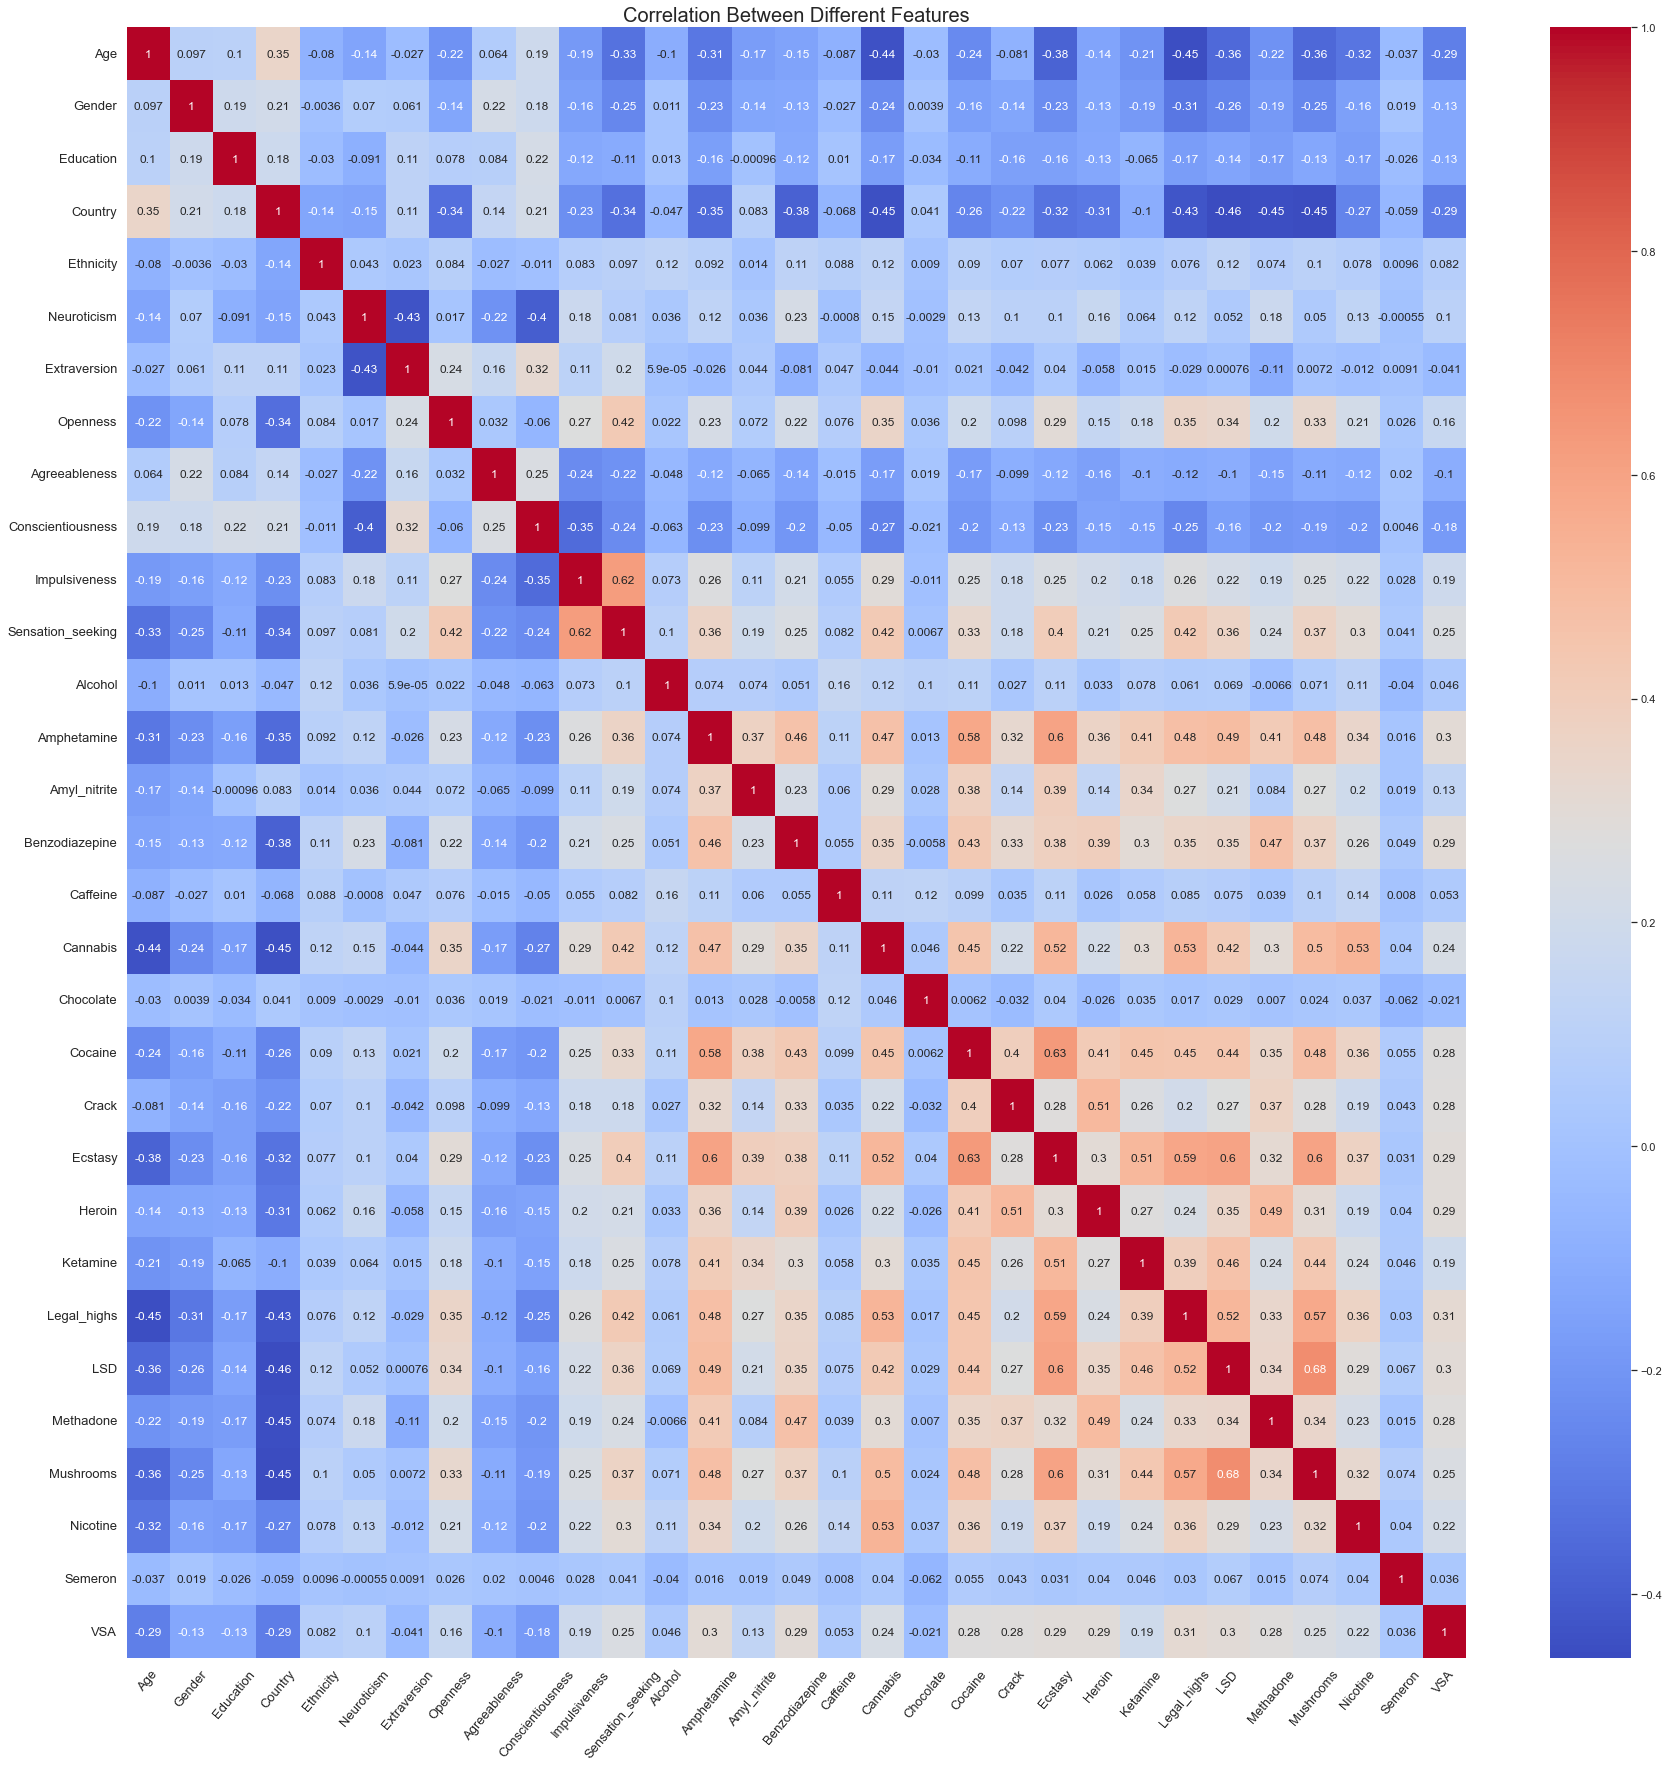

In [13]:
#Plotting a correlation matrix between all the columns
corrmat = drug_data.corr()

plt.figure(figsize=(30,30))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'coolwarm',annot=True, yticklabels = drug_data.columns, xticklabels = drug_data.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation Between Different Features",fontsize=20)
plt.show()

In [14]:
#find total users and non users for each drug
total_data = len(drug_data.index)
for column in drug_names:
    print("Total", column,"users =", drug_data[column].sum(), ", % of total = {:.2f}".format(drug_data[column].sum()*100/total_data))
    
#Validated Against Research Paper 1    

Total Alcohol users = 1817 , % of total = 96.39
Total Amphetamine users = 679 , % of total = 36.02
Total Amyl_nitrite users = 370 , % of total = 19.63
Total Benzodiazepine users = 769 , % of total = 40.80
Total Caffeine users = 1848 , % of total = 98.04
Total Cannabis users = 1265 , % of total = 67.11
Total Chocolate users = 1850 , % of total = 98.14
Total Cocaine users = 687 , % of total = 36.45
Total Crack users = 191 , % of total = 10.13
Total Ecstasy users = 751 , % of total = 39.84
Total Heroin users = 212 , % of total = 11.25
Total Ketamine users = 350 , % of total = 18.57
Total Legal_highs users = 762 , % of total = 40.42
Total LSD users = 557 , % of total = 29.55
Total Methadone users = 417 , % of total = 22.12
Total Mushrooms users = 694 , % of total = 36.82
Total Nicotine users = 1264 , % of total = 67.06
Total Semeron users = 6 , % of total = 0.32
Total VSA users = 230 , % of total = 12.20


I am choosing the following 6 druds to work on my models considering the variations in data available about the users and non users
1. Alcohol, 2. Amphetamine, 3. Benzodiazepine, 4. Cannabis, 5. Ecstasy, 6. Nicotine

In [15]:
#Creating a new Dataset of just independent variables (to be used for building models on each of the selected drugs) 
feature_dataset = drug_data[dependent_features]
len(feature_dataset.index)

1885

# Creating 4 Models for Alcohol User Classification

In [16]:
#Load Data in X and Y Dataframes
X_alcohol = feature_dataset
Y_alcohol = drug_data[["Alcohol"]]

#Perform Train-Test Split
X_alcohol_train, X_alcohol_test, y_alcohol_train, y_alcohol_test = train_test_split(X_alcohol , Y_alcohol, test_size = 0.33, random_state = 42)
print("Training split input- ", X_alcohol_train.shape)
print("Testing split input- ", X_alcohol_test.shape)

Training split input-  (1262, 12)
Testing split input-  (623, 12)


In [17]:
#Build Decision Tree Model
alcohol_DT_classifier=DecisionTreeClassifier()
alcohol_DT_classifier.fit(X_alcohol_train,y_alcohol_train)

# Predicting the values of test data
y_alcohol_DT_pred = alcohol_DT_classifier.predict(X_alcohol_test)
print("Classification report - \n", classification_report(y_alcohol_test,y_alcohol_DT_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.09      0.14      0.11        22
           1       0.97      0.95      0.96       601

    accuracy                           0.92       623
   macro avg       0.53      0.54      0.53       623
weighted avg       0.94      0.92      0.93       623



In [ ]:
#Visualizing Tree 
plt.figure(figsize = (250,250))
dec_tree = plot_tree(decision_tree=alcohol_DT_classifier, feature_names = X_alcohol.columns, 
                     class_names =["0", "1"] , filled = True , precision = 4, rounded = True)
plt.savefig("Decision Tree Alcohol.png")


Image has been attached separately as 'Decision Tree Alcohol.png'.

In [18]:
#Build KNN Model
alcohol_KNN_classifier = KNeighborsClassifier(n_neighbors=5)
alcohol_KNN_classifier.fit(X_alcohol_train, y_alcohol_train.values.ravel())
y_alcohol_KNN_pred = alcohol_KNN_classifier.predict(X_alcohol_test)
print("Classification report - \n", classification_report(y_alcohol_test,y_alcohol_KNN_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.96      1.00      0.98       601

    accuracy                           0.96       623
   macro avg       0.48      0.50      0.49       623
weighted avg       0.93      0.96      0.95       623



In [19]:
#Build RF Model
alcohol_RF_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
alcohol_RF_classifier.fit(X_alcohol_train,y_alcohol_train.values.ravel())

y_alcohol_RF_pred = alcohol_RF_classifier.predict(X_alcohol_test)
print("Classification report - \n", classification_report(y_alcohol_test,y_alcohol_RF_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.96      1.00      0.98       601

    accuracy                           0.96       623
   macro avg       0.48      0.50      0.49       623
weighted avg       0.93      0.96      0.95       623



/Users/shubhamkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shubhamkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shubhamkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [20]:
#Build SVM Model
alcohol_SVM_classifier = SVC(kernel = 'rbf', gamma='auto', C=2)
alcohol_SVM_classifier.fit(X_alcohol_train, y_alcohol_train.values.ravel())
y_alcohol_SVM_pred = alcohol_SVM_classifier.predict(X_alcohol_test)
print("Classification report - \n", classification_report(y_alcohol_test,y_alcohol_SVM_pred))


Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.96      1.00      0.98       601

    accuracy                           0.96       623
   macro avg       0.48      0.50      0.49       623
weighted avg       0.93      0.96      0.95       623



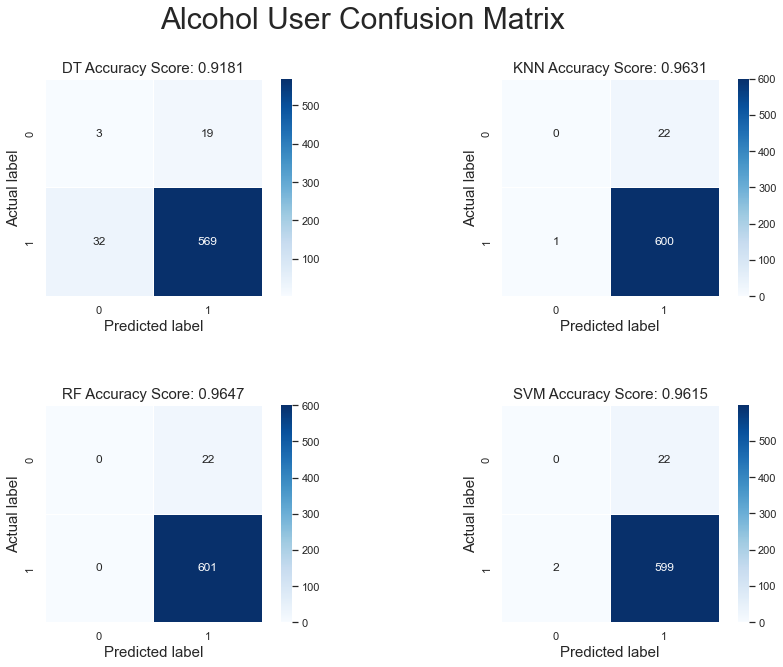

In [21]:
#Plotting Confusion matrix for all models
fig, ax =plt.subplots(2,2,figsize=(15,10))

fig.suptitle('Alcohol User Confusion Matrix', fontsize=30)

alcohol_DT_cm = confusion_matrix(y_alcohol_test, y_alcohol_DT_pred)
sns.heatmap(data=alcohol_DT_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][0])
all_sample_title = 'DT Accuracy Score: {0:.4f}'.format(alcohol_DT_classifier.score(X_alcohol_test, y_alcohol_test))
ax[0][0].set_title(all_sample_title, size = 15)

alcohol_KNN_cm = confusion_matrix(y_alcohol_test, y_alcohol_KNN_pred)
sns.heatmap(data=alcohol_KNN_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][1])
all_sample_title = 'KNN Accuracy Score: {0:.4f}'.format(alcohol_KNN_classifier.score(X_alcohol_test, y_alcohol_test))
ax[0][1].set_title(all_sample_title, size = 15)

alcohol_RF_cm = confusion_matrix(y_alcohol_test, y_alcohol_RF_pred)
sns.heatmap(data=alcohol_RF_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][0])
all_sample_title = 'RF Accuracy Score: {0:.4f}'.format(alcohol_RF_classifier.score(X_alcohol_test, y_alcohol_test))
ax[1][0].set_title(all_sample_title, size = 15)

alcohol_SVM_cm = confusion_matrix(y_alcohol_test, y_alcohol_SVM_pred)
sns.heatmap(data=alcohol_SVM_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][1])
all_sample_title = 'SVM Accuracy Score: {0:.4f}'.format(alcohol_SVM_classifier.score(X_alcohol_test, y_alcohol_test))
ax[1][1].set_title(all_sample_title, size = 15)



for i in range (2):
    for j in range (2):
        ax[i][j].set_xlabel('Predicted label',fontsize = 15)
        ax[i][j].set_ylabel('Actual label',fontsize = 15)

fig.subplots_adjust(hspace=0.5)

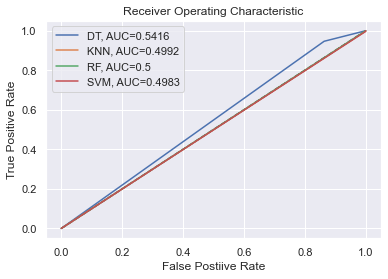

In [22]:
#Plotting ROC Curves for all models
fpr1 , tpr1, thresholds1 = roc_curve(y_alcohol_test, y_alcohol_DT_pred)
auc_alcohol_DT = round(metrics.roc_auc_score(y_alcohol_test, y_alcohol_DT_pred), 4)
fpr2 , tpr2, thresholds2 = roc_curve(y_alcohol_test, y_alcohol_KNN_pred)
auc_alcohol_KNN = round(metrics.roc_auc_score(y_alcohol_test, y_alcohol_KNN_pred), 4)
fpr3 , tpr3, thresholds3 = roc_curve(y_alcohol_test, y_alcohol_RF_pred)
auc_alcohol_RF = round(metrics.roc_auc_score(y_alcohol_test, y_alcohol_RF_pred), 4)
fpr4 , tpr4, thresholds4 = roc_curve(y_alcohol_test, y_alcohol_SVM_pred)
auc_alcohol_SVM = round(metrics.roc_auc_score(y_alcohol_test, y_alcohol_SVM_pred), 4)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "DT, AUC="+str(auc_alcohol_DT))
plt.plot(fpr2, tpr2, label= "KNN, AUC="+str(auc_alcohol_KNN))
plt.plot(fpr3, tpr3, label= "RF, AUC="+str(auc_alcohol_RF))
plt.plot(fpr4, tpr4, label= "SVM, AUC="+str(auc_alcohol_SVM))

plt.legend()
plt.xlabel("False Postiive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

# Creating 4 Models for Amphetamine User Classification

In [23]:
#Load Data in X and Y Dataframes
X_amphetamine = feature_dataset
Y_amphetamine = drug_data[["Amphetamine"]]

#Perform Train-Test Split
X_amphetamine_train, X_amphetamine_test, y_amphetamine_train, y_amphetamine_test = train_test_split(X_amphetamine , Y_amphetamine, test_size = 0.33, random_state = 42)
print("Training split input- ", X_amphetamine_train.shape)
print("Testing split input- ", X_amphetamine_test.shape)

Training split input-  (1262, 12)
Testing split input-  (623, 12)


In [24]:
#Build Decision Tree Model
amphetamine_DT_classifier=DecisionTreeClassifier()
amphetamine_DT_classifier.fit(X_amphetamine_train,y_amphetamine_train)

# Predicting the values of test data
y_amphetamine_DT_pred = amphetamine_DT_classifier.predict(X_amphetamine_test)
print("Classification report - \n", classification_report(y_amphetamine_test,y_amphetamine_DT_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.77      0.70      0.74       406
           1       0.53      0.61      0.57       217

    accuracy                           0.67       623
   macro avg       0.65      0.66      0.65       623
weighted avg       0.69      0.67      0.68       623



In [ ]:
#Visualizing Tree
plt.figure(figsize = (250,250))
dec_tree = plot_tree(decision_tree=amphetamine_DT_classifier, feature_names = X_amphetamine.columns, 
                     class_names =["0", "1"] , filled = True , precision = 4, rounded = True)
plt.savefig("Decision Tree Amphetamine.png")

Image has been attached separately as 'Decision Tree Amphetamine.png'.

In [25]:
#Build KNN Model
amphetamine_KNN_classifier = KNeighborsClassifier(n_neighbors=5)
amphetamine_KNN_classifier.fit(X_amphetamine_train, y_amphetamine_train.values.ravel())
y_amphetamine_KNN_pred = amphetamine_KNN_classifier.predict(X_amphetamine_test)
print("Classification report - \n", classification_report(y_amphetamine_test,y_amphetamine_KNN_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       406
           1       0.53      0.54      0.54       217

    accuracy                           0.67       623
   macro avg       0.64      0.64      0.64       623
weighted avg       0.68      0.67      0.67       623



In [26]:
#Build RF Model
amphetamine_RF_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
amphetamine_RF_classifier.fit(X_amphetamine_train,y_amphetamine_train.values.ravel())

y_amphetamine_RF_pred = amphetamine_RF_classifier.predict(X_amphetamine_test)
print("Classification report - \n", classification_report(y_amphetamine_test,y_amphetamine_RF_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       406
           1       0.59      0.59      0.59       217

    accuracy                           0.72       623
   macro avg       0.69      0.69      0.69       623
weighted avg       0.72      0.72      0.72       623



In [27]:
#Build SVM Model
amphetamine_SVM_classifier = SVC(kernel = 'linear', gamma='auto', C=2)
amphetamine_SVM_classifier.fit(X_amphetamine_train, y_amphetamine_train.values.ravel())
y_amphetamine_SVM_pred = amphetamine_SVM_classifier.predict(X_amphetamine_test)
print("Classification report - \n", classification_report(y_amphetamine_test,y_amphetamine_SVM_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       406
           1       0.57      0.58      0.58       217

    accuracy                           0.70       623
   macro avg       0.67      0.67      0.67       623
weighted avg       0.70      0.70      0.70       623



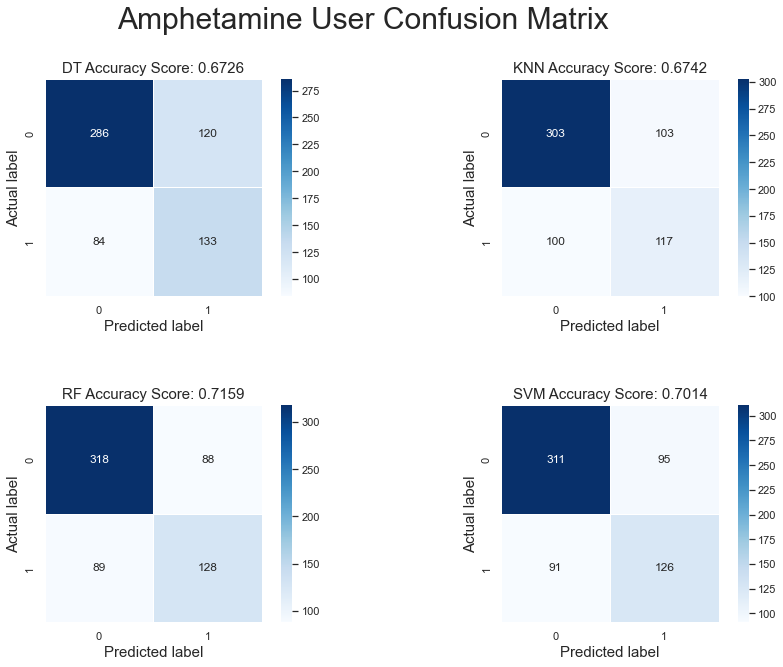

In [28]:
#Plotting Confusion matrix for all models
fig, ax =plt.subplots(2,2,figsize=(15,10))

fig.suptitle('Amphetamine User Confusion Matrix', fontsize=30)

amphetamine_DT_cm = confusion_matrix(y_amphetamine_test, y_amphetamine_DT_pred)
sns.heatmap(data=amphetamine_DT_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][0])
all_sample_title = 'DT Accuracy Score: {0:.4f}'.format(amphetamine_DT_classifier.score(X_amphetamine_test, y_amphetamine_test))
ax[0][0].set_title(all_sample_title, size = 15)

amphetamine_KNN_cm = confusion_matrix(y_amphetamine_test, y_amphetamine_KNN_pred)
sns.heatmap(data=amphetamine_KNN_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][1])
all_sample_title = 'KNN Accuracy Score: {0:.4f}'.format(amphetamine_KNN_classifier.score(X_amphetamine_test, y_amphetamine_test))
ax[0][1].set_title(all_sample_title, size = 15)

amphetamine_RF_cm = confusion_matrix(y_amphetamine_test, y_amphetamine_RF_pred)
sns.heatmap(data=amphetamine_RF_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][0])
all_sample_title = 'RF Accuracy Score: {0:.4f}'.format(amphetamine_RF_classifier.score(X_amphetamine_test, y_amphetamine_test))
ax[1][0].set_title(all_sample_title, size = 15)

amphetamine_SVM_cm = confusion_matrix(y_amphetamine_test, y_amphetamine_SVM_pred)
sns.heatmap(data=amphetamine_SVM_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][1])
all_sample_title = 'SVM Accuracy Score: {0:.4f}'.format(amphetamine_SVM_classifier.score(X_amphetamine_test, y_amphetamine_test))
ax[1][1].set_title(all_sample_title, size = 15)



for i in range (2):
    for j in range (2):
        ax[i][j].set_xlabel('Predicted label',fontsize = 15)
        ax[i][j].set_ylabel('Actual label',fontsize = 15)

fig.subplots_adjust(hspace=0.5)

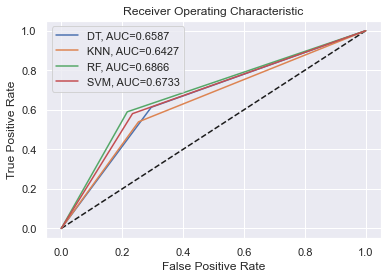

In [29]:
#Plotting ROC Curves for all models

fpr1 , tpr1, thresholds1 = roc_curve(y_amphetamine_test, y_amphetamine_DT_pred)
auc_amphetamine_DT = round(metrics.roc_auc_score(y_amphetamine_test, y_amphetamine_DT_pred), 4)
fpr2 , tpr2, thresholds2 = roc_curve(y_amphetamine_test, y_amphetamine_KNN_pred)
auc_amphetamine_KNN = round(metrics.roc_auc_score(y_amphetamine_test, y_amphetamine_KNN_pred), 4)
fpr3 , tpr3, thresholds3 = roc_curve(y_amphetamine_test, y_amphetamine_RF_pred)
auc_amphetamine_RF = round(metrics.roc_auc_score(y_amphetamine_test, y_amphetamine_RF_pred), 4)
fpr4 , tpr4, thresholds4 = roc_curve(y_amphetamine_test, y_amphetamine_SVM_pred)
auc_amphetamine_SVM = round(metrics.roc_auc_score(y_amphetamine_test, y_amphetamine_SVM_pred), 4)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "DT, AUC="+str(auc_amphetamine_DT))
plt.plot(fpr2, tpr2, label= "KNN, AUC="+str(auc_amphetamine_KNN))
plt.plot(fpr3, tpr3, label= "RF, AUC="+str(auc_amphetamine_RF))
plt.plot(fpr4, tpr4, label= "SVM, AUC="+str(auc_amphetamine_SVM))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

# Creating 4 Models for Benzodiazepine User Classification

In [30]:
#Load Data in X and Y Dataframes
X_benzodiazepine = feature_dataset
Y_benzodiazepine = drug_data[["Benzodiazepine"]]

#Perform Train-Test Split
X_benzodiazepine_train, X_benzodiazepine_test, y_benzodiazepine_train, y_benzodiazepine_test = train_test_split(X_benzodiazepine , Y_benzodiazepine, test_size = 0.33, random_state = 42)
print("Training split input- ", X_benzodiazepine_train.shape)
print("Testing split input- ", X_benzodiazepine_test.shape)

Training split input-  (1262, 12)
Testing split input-  (623, 12)


In [31]:
#Build Decision Tree Model
benzodiazepine_DT_classifier=DecisionTreeClassifier()
benzodiazepine_DT_classifier.fit(X_benzodiazepine_train,y_benzodiazepine_train)

# Predicting the values of test data
y_benzodiazepine_DT_pred = benzodiazepine_DT_classifier.predict(X_benzodiazepine_test)
print("Classification report - \n", classification_report(y_benzodiazepine_test,y_benzodiazepine_DT_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       367
           1       0.55      0.56      0.55       256

    accuracy                           0.63       623
   macro avg       0.62      0.62      0.62       623
weighted avg       0.63      0.63      0.63       623



In [ ]:
#Visualizing tree
plt.figure(figsize = (250,250))
dec_tree = plot_tree(decision_tree=benzodiazepine_DT_classifier, feature_names = X_benzodiazepine.columns, 
                     class_names =["0", "1"] , filled = True , precision = 4, rounded = True)
plt.savefig("Decision Tree Benzodiazepine.png")

Image has been attached separately as 'Decision Tree Benzodiazepine.png'.

In [32]:
#Build KNN Model
benzodiazepine_KNN_classifier = KNeighborsClassifier(n_neighbors=15)
benzodiazepine_KNN_classifier.fit(X_benzodiazepine_train, y_benzodiazepine_train.values.ravel())
y_benzodiazepine_KNN_pred = benzodiazepine_KNN_classifier.predict(X_benzodiazepine_test)
print("Classification report - \n", classification_report(y_benzodiazepine_test,y_benzodiazepine_KNN_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       367
           1       0.65      0.54      0.59       256

    accuracy                           0.69       623
   macro avg       0.68      0.67      0.67       623
weighted avg       0.69      0.69      0.69       623



In [33]:
#Build RF Model
benzodiazepine_RF_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
benzodiazepine_RF_classifier.fit(X_benzodiazepine_train,y_benzodiazepine_train.values.ravel())

y_benzodiazepine_RF_pred = benzodiazepine_RF_classifier.predict(X_benzodiazepine_test)
print("Classification report - \n", classification_report(y_benzodiazepine_test,y_benzodiazepine_RF_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       367
           1       0.68      0.57      0.62       256

    accuracy                           0.71       623
   macro avg       0.70      0.69      0.69       623
weighted avg       0.71      0.71      0.71       623



In [34]:
#Build SVM
benzodiazepine_SVM_classifier = SVC(kernel = 'linear', gamma='auto', C=2)
benzodiazepine_SVM_classifier.fit(X_benzodiazepine_train, y_benzodiazepine_train.values.ravel())
y_benzodiazepine_SVM_pred = benzodiazepine_SVM_classifier.predict(X_benzodiazepine_test)
print("Classification report - \n", classification_report(y_benzodiazepine_test,y_benzodiazepine_SVM_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.74      0.75      0.75       367
           1       0.64      0.62      0.63       256

    accuracy                           0.70       623
   macro avg       0.69      0.69      0.69       623
weighted avg       0.70      0.70      0.70       623



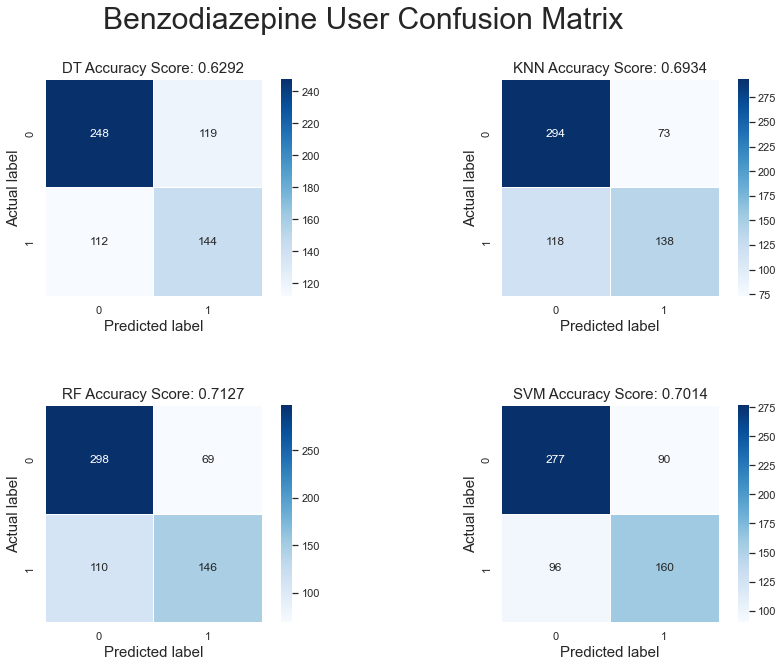

In [35]:
#Plotting Confusion matrix for all models
fig, ax =plt.subplots(2,2,figsize=(15,10))

fig.suptitle('Benzodiazepine User Confusion Matrix', fontsize=30)

benzodiazepine_DT_cm = confusion_matrix(y_benzodiazepine_test, y_benzodiazepine_DT_pred)
sns.heatmap(data=benzodiazepine_DT_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][0])
all_sample_title = 'DT Accuracy Score: {0:.4f}'.format(benzodiazepine_DT_classifier.score(X_benzodiazepine_test, y_benzodiazepine_test))
ax[0][0].set_title(all_sample_title, size = 15)

benzodiazepine_KNN_cm = confusion_matrix(y_benzodiazepine_test, y_benzodiazepine_KNN_pred)
sns.heatmap(data=benzodiazepine_KNN_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][1])
all_sample_title = 'KNN Accuracy Score: {0:.4f}'.format(benzodiazepine_KNN_classifier.score(X_benzodiazepine_test, y_benzodiazepine_test))
ax[0][1].set_title(all_sample_title, size = 15)

benzodiazepine_RF_cm = confusion_matrix(y_benzodiazepine_test, y_benzodiazepine_RF_pred)
sns.heatmap(data=benzodiazepine_RF_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][0])
all_sample_title = 'RF Accuracy Score: {0:.4f}'.format(benzodiazepine_RF_classifier.score(X_benzodiazepine_test, y_benzodiazepine_test))
ax[1][0].set_title(all_sample_title, size = 15)

benzodiazepine_SVM_cm = confusion_matrix(y_benzodiazepine_test, y_benzodiazepine_SVM_pred)
sns.heatmap(data=benzodiazepine_SVM_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][1])
all_sample_title = 'SVM Accuracy Score: {0:.4f}'.format(benzodiazepine_SVM_classifier.score(X_benzodiazepine_test, y_benzodiazepine_test))
ax[1][1].set_title(all_sample_title, size = 15)


for i in range (2):
    for j in range (2):
        ax[i][j].set_xlabel('Predicted label',fontsize = 15)
        ax[i][j].set_ylabel('Actual label',fontsize = 15)

fig.subplots_adjust(hspace=0.5)

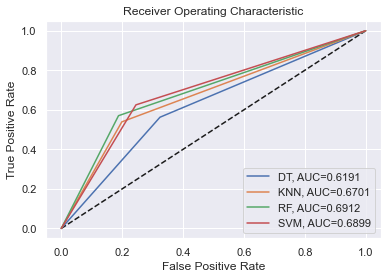

In [36]:
#Plotting ROC Curves for all models

fpr1 , tpr1, thresholds1 = roc_curve(y_benzodiazepine_test, y_benzodiazepine_DT_pred)
auc_benzodiazepine_DT = round(metrics.roc_auc_score(y_benzodiazepine_test, y_benzodiazepine_DT_pred), 4)
fpr2 , tpr2, thresholds2 = roc_curve(y_benzodiazepine_test, y_benzodiazepine_KNN_pred)
auc_benzodiazepine_KNN = round(metrics.roc_auc_score(y_benzodiazepine_test, y_benzodiazepine_KNN_pred), 4)
fpr3 , tpr3, thresholds3 = roc_curve(y_benzodiazepine_test, y_benzodiazepine_RF_pred)
auc_benzodiazepine_RF = round(metrics.roc_auc_score(y_benzodiazepine_test, y_benzodiazepine_RF_pred), 4)
fpr4 , tpr4, thresholds4 = roc_curve(y_benzodiazepine_test, y_benzodiazepine_SVM_pred)
auc_benzodiazepine_SVM = round(metrics.roc_auc_score(y_benzodiazepine_test, y_benzodiazepine_SVM_pred), 4)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "DT, AUC="+str(auc_benzodiazepine_DT))
plt.plot(fpr2, tpr2, label= "KNN, AUC="+str(auc_benzodiazepine_KNN))
plt.plot(fpr3, tpr3, label= "RF, AUC="+str(auc_benzodiazepine_RF))
plt.plot(fpr4, tpr4, label= "SVM, AUC="+str(auc_benzodiazepine_SVM))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

# Creating 4 Models for Cannabis User Classification

In [37]:
#Load Data in X and Y Dataframes
X_cannabis = feature_dataset
Y_cannabis = drug_data[["Cannabis"]]

#Perform Train-Test Split
X_cannabis_train, X_cannabis_test, y_cannabis_train, y_cannabis_test = train_test_split(X_cannabis , Y_cannabis, test_size = 0.33, random_state = 42)
print("Training split input- ", X_cannabis_train.shape)
print("Testing split input- ", X_cannabis_test.shape)

Training split input-  (1262, 12)
Testing split input-  (623, 12)


In [38]:
#Build Decision Tree Model
cannabis_DT_classifier=DecisionTreeClassifier()
cannabis_DT_classifier.fit(X_cannabis_train,y_cannabis_train)

# Predicting the values of test data
y_cannabis_DT_pred = cannabis_DT_classifier.predict(X_cannabis_test)
print("Classification report - \n", classification_report(y_cannabis_test,y_cannabis_DT_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.59      0.61      0.60       188
           1       0.83      0.82      0.82       435

    accuracy                           0.76       623
   macro avg       0.71      0.72      0.71       623
weighted avg       0.76      0.76      0.76       623



In [ ]:
#Visualizing Tree
plt.figure(figsize = (250,250))
dec_tree = plot_tree(decision_tree=cannabis_DT_classifier, feature_names = X_cannabis.columns, 
                     class_names =["0", "1"] , filled = True , precision = 4, rounded = True)
plt.savefig("Decision Tree Cannabis.png")

Image has been attached separately as 'Decision Tree Cannabis.png'.

In [39]:
#Build KNN Model
cannabis_KNN_classifier = KNeighborsClassifier(n_neighbors=15)
cannabis_KNN_classifier.fit(X_cannabis_train, y_cannabis_train.values.ravel())
y_cannabis_KNN_pred = cannabis_KNN_classifier.predict(X_cannabis_test)
print("Classification report - \n", classification_report(y_cannabis_test,y_cannabis_KNN_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.66      0.65      0.65       188
           1       0.85      0.86      0.85       435

    accuracy                           0.79       623
   macro avg       0.75      0.75      0.75       623
weighted avg       0.79      0.79      0.79       623



In [40]:
#Build RF Model
cannabis_RF_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
cannabis_RF_classifier.fit(X_cannabis_train,y_cannabis_train.values.ravel())

y_cannabis_RF_pred = cannabis_RF_classifier.predict(X_cannabis_test)
print("Classification report - \n", classification_report(y_cannabis_test,y_cannabis_RF_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       188
           1       0.87      0.89      0.88       435

    accuracy                           0.82       623
   macro avg       0.79      0.78      0.79       623
weighted avg       0.82      0.82      0.82       623



In [41]:
#Build SVM Model
cannabis_SVM_classifier = SVC(kernel = 'linear', gamma='auto', C=2)
cannabis_SVM_classifier.fit(X_cannabis_train, y_cannabis_train.values.ravel())
y_cannabis_SVM_pred = cannabis_SVM_classifier.predict(X_cannabis_test)
print("Classification report - \n", classification_report(y_cannabis_test,y_cannabis_SVM_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       188
           1       0.88      0.87      0.88       435

    accuracy                           0.83       623
   macro avg       0.80      0.80      0.80       623
weighted avg       0.83      0.83      0.83       623



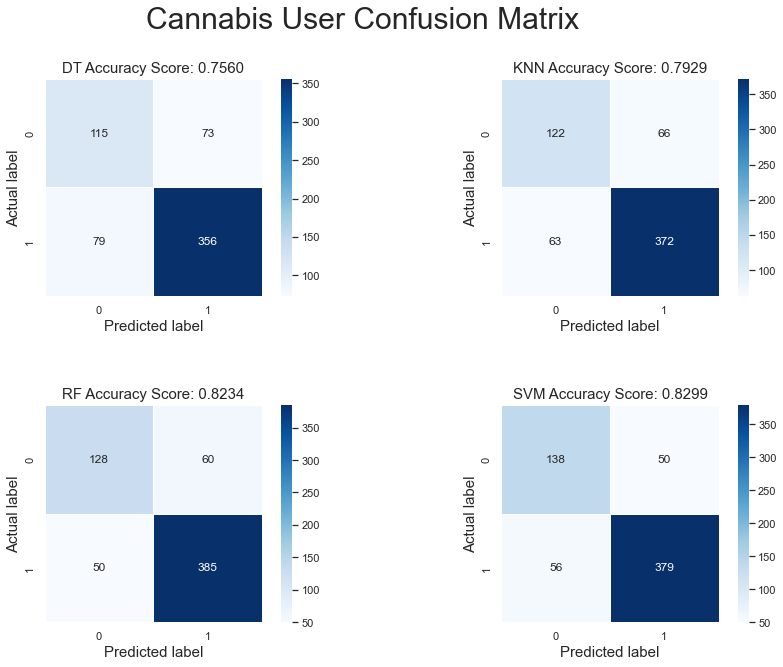

In [42]:
#Plotting Confusion matrix for all models
fig, ax =plt.subplots(2,2,figsize=(15,10))

fig.suptitle('Cannabis User Confusion Matrix', fontsize=30)

cannabis_DT_cm = confusion_matrix(y_cannabis_test, y_cannabis_DT_pred)
sns.heatmap(data=cannabis_DT_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][0])
all_sample_title = 'DT Accuracy Score: {0:.4f}'.format(cannabis_DT_classifier.score(X_cannabis_test, y_cannabis_test))
ax[0][0].set_title(all_sample_title, size = 15)

cannabis_KNN_cm = confusion_matrix(y_cannabis_test, y_cannabis_KNN_pred)
sns.heatmap(data=cannabis_KNN_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][1])
all_sample_title = 'KNN Accuracy Score: {0:.4f}'.format(cannabis_KNN_classifier.score(X_cannabis_test, y_cannabis_test))
ax[0][1].set_title(all_sample_title, size = 15)

cannabis_RF_cm = confusion_matrix(y_cannabis_test, y_cannabis_RF_pred)
sns.heatmap(data=cannabis_RF_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][0])
all_sample_title = 'RF Accuracy Score: {0:.4f}'.format(cannabis_RF_classifier.score(X_cannabis_test, y_cannabis_test))
ax[1][0].set_title(all_sample_title, size = 15)

cannabis_SVM_cm = confusion_matrix(y_cannabis_test, y_cannabis_SVM_pred)
sns.heatmap(data=cannabis_SVM_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][1])
all_sample_title = 'SVM Accuracy Score: {0:.4f}'.format(cannabis_SVM_classifier.score(X_cannabis_test, y_cannabis_test))
ax[1][1].set_title(all_sample_title, size = 15)



for i in range (2):
    for j in range (2):
        ax[i][j].set_xlabel('Predicted label',fontsize = 15)
        ax[i][j].set_ylabel('Actual label',fontsize = 15)

fig.subplots_adjust(hspace=0.5)

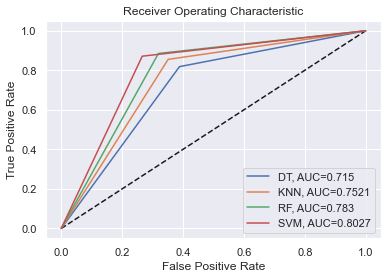

In [43]:
#Plotting ROC Curves for all models

fpr1 , tpr1, thresholds1 = roc_curve(y_cannabis_test, y_cannabis_DT_pred)
auc_cannabis_DT = round(metrics.roc_auc_score(y_cannabis_test, y_cannabis_DT_pred), 4)
fpr2 , tpr2, thresholds2 = roc_curve(y_cannabis_test, y_cannabis_KNN_pred)
auc_cannabis_KNN = round(metrics.roc_auc_score(y_cannabis_test, y_cannabis_KNN_pred), 4)
fpr3 , tpr3, thresholds3 = roc_curve(y_cannabis_test, y_cannabis_RF_pred)
auc_cannabis_RF = round(metrics.roc_auc_score(y_cannabis_test, y_cannabis_RF_pred), 4)
fpr4 , tpr4, thresholds4 = roc_curve(y_cannabis_test, y_cannabis_SVM_pred)
auc_cannabis_SVM = round(metrics.roc_auc_score(y_cannabis_test, y_cannabis_SVM_pred), 4)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "DT, AUC="+str(auc_cannabis_DT))
plt.plot(fpr2, tpr2, label= "KNN, AUC="+str(auc_cannabis_KNN))
plt.plot(fpr3, tpr3, label= "RF, AUC="+str(auc_cannabis_RF))
plt.plot(fpr4, tpr4, label= "SVM, AUC="+str(auc_cannabis_SVM))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

# Creating 4 Models for Ecstasy User Classification

In [44]:
#Load Data in X and Y Dataframes
X_ecstasy = feature_dataset
Y_ecstasy = drug_data[["Ecstasy"]]

#Perform Train-Test Split
X_ecstasy_train, X_ecstasy_test, y_ecstasy_train, y_ecstasy_test = train_test_split(X_ecstasy , Y_ecstasy, test_size = 0.33, random_state = 42)
print("Training split input- ", X_ecstasy_train.shape)
print("Testing split input- ", X_ecstasy_test.shape)

Training split input-  (1262, 12)
Testing split input-  (623, 12)


In [45]:
#Build Decision Tree Model
ecstasy_DT_classifier=DecisionTreeClassifier()
ecstasy_DT_classifier.fit(X_ecstasy_train,y_ecstasy_train)

# Predicting the values of test data
y_ecstasy_DT_pred = ecstasy_DT_classifier.predict(X_ecstasy_test)
print("Classification report - \n", classification_report(y_ecstasy_test,y_ecstasy_DT_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       371
           1       0.53      0.56      0.54       252

    accuracy                           0.62       623
   macro avg       0.61      0.61      0.61       623
weighted avg       0.62      0.62      0.62       623



In [ ]:
#Visualizing Tree 
plt.figure(figsize = (250,250))
dec_tree = plot_tree(decision_tree=ecstasy_DT_classifier, feature_names = X_ecstasy.columns, 
                     class_names =["0", "1"] , filled = True , precision = 4, rounded = True)
plt.savefig("Decision Tree Ecstasy.png")

Image has been attached separately as 'Decision Tree Ecstasy.png'.

In [46]:
#Build KNN Model

ecstasy_KNN_classifier = KNeighborsClassifier(n_neighbors=15)
ecstasy_KNN_classifier.fit(X_ecstasy_train, y_ecstasy_train.values.ravel())
y_ecstasy_KNN_pred = ecstasy_KNN_classifier.predict(X_ecstasy_test)
print("Classification report - \n", classification_report(y_ecstasy_test,y_ecstasy_KNN_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       371
           1       0.64      0.59      0.61       252

    accuracy                           0.70       623
   macro avg       0.69      0.68      0.68       623
weighted avg       0.70      0.70      0.70       623



In [47]:
#Build RF Model

ecstasy_RF_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
ecstasy_RF_classifier.fit(X_ecstasy_train,y_ecstasy_train.values.ravel())

y_ecstasy_RF_pred = ecstasy_RF_classifier.predict(X_ecstasy_test)
print("Classification report - \n", classification_report(y_ecstasy_test,y_ecstasy_RF_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       371
           1       0.65      0.69      0.67       252

    accuracy                           0.73       623
   macro avg       0.72      0.72      0.72       623
weighted avg       0.73      0.73      0.73       623



In [48]:
#Build SVM Model

ecstasy_SVM_classifier = SVC(kernel = 'linear', gamma='auto', C=2)
ecstasy_SVM_classifier.fit(X_ecstasy_train, y_ecstasy_train.values.ravel())
y_ecstasy_SVM_pred = ecstasy_SVM_classifier.predict(X_ecstasy_test)
print("Classification report - \n", classification_report(y_ecstasy_test,y_ecstasy_SVM_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       371
           1       0.69      0.68      0.68       252

    accuracy                           0.74       623
   macro avg       0.74      0.73      0.73       623
weighted avg       0.74      0.74      0.74       623



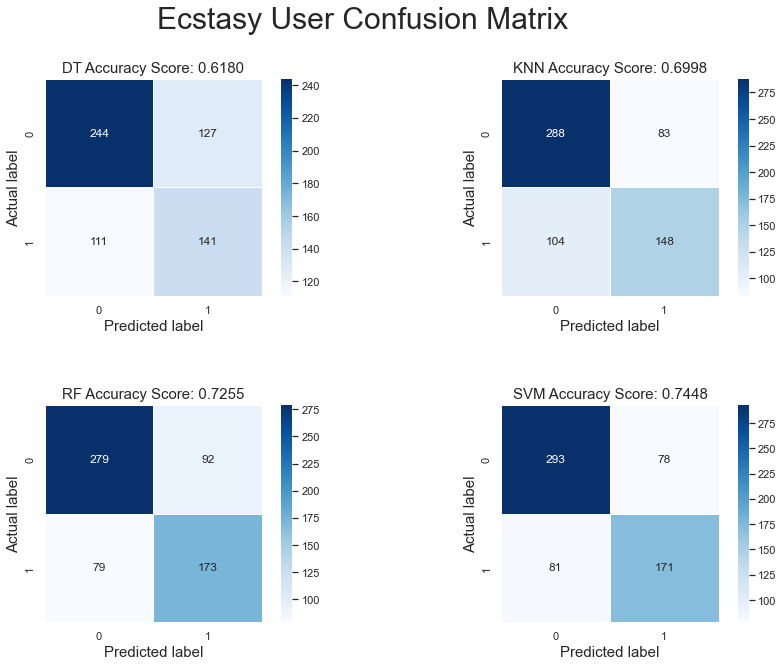

In [49]:
#Plotting Confusion matrix for all models
fig, ax =plt.subplots(2,2,figsize=(15,10))

fig.suptitle('Ecstasy User Confusion Matrix', fontsize=30)

ecstasy_DT_cm = confusion_matrix(y_ecstasy_test, y_ecstasy_DT_pred)
sns.heatmap(data=ecstasy_DT_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][0])
all_sample_title = 'DT Accuracy Score: {0:.4f}'.format(ecstasy_DT_classifier.score(X_ecstasy_test, y_ecstasy_test))
ax[0][0].set_title(all_sample_title, size = 15)

ecstasy_KNN_cm = confusion_matrix(y_ecstasy_test, y_ecstasy_KNN_pred)
sns.heatmap(data=ecstasy_KNN_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][1])
all_sample_title = 'KNN Accuracy Score: {0:.4f}'.format(ecstasy_KNN_classifier.score(X_ecstasy_test, y_ecstasy_test))
ax[0][1].set_title(all_sample_title, size = 15)

ecstasy_RF_cm = confusion_matrix(y_ecstasy_test, y_ecstasy_RF_pred)
sns.heatmap(data=ecstasy_RF_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][0])
all_sample_title = 'RF Accuracy Score: {0:.4f}'.format(ecstasy_RF_classifier.score(X_ecstasy_test, y_ecstasy_test))
ax[1][0].set_title(all_sample_title, size = 15)

ecstasy_SVM_cm = confusion_matrix(y_ecstasy_test, y_ecstasy_SVM_pred)
sns.heatmap(data=ecstasy_SVM_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][1])
all_sample_title = 'SVM Accuracy Score: {0:.4f}'.format(ecstasy_SVM_classifier.score(X_ecstasy_test, y_ecstasy_test))
ax[1][1].set_title(all_sample_title, size = 15)



for i in range (2):
    for j in range (2):
        ax[i][j].set_xlabel('Predicted label',fontsize = 15)
        ax[i][j].set_ylabel('Actual label',fontsize = 15)

fig.subplots_adjust(hspace=0.5)

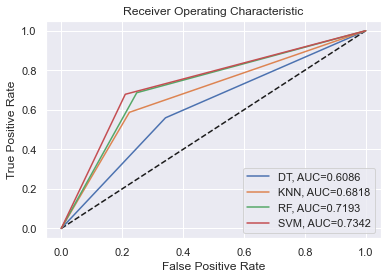

In [50]:
#Plotting ROC Curves for all models

fpr1 , tpr1, thresholds1 = roc_curve(y_ecstasy_test, y_ecstasy_DT_pred)
auc_ecstasy_DT = round(metrics.roc_auc_score(y_ecstasy_test, y_ecstasy_DT_pred), 4)
fpr2 , tpr2, thresholds2 = roc_curve(y_ecstasy_test, y_ecstasy_KNN_pred)
auc_ecstasy_KNN = round(metrics.roc_auc_score(y_ecstasy_test, y_ecstasy_KNN_pred), 4)
fpr3 , tpr3, thresholds3 = roc_curve(y_ecstasy_test, y_ecstasy_RF_pred)
auc_ecstasy_RF = round(metrics.roc_auc_score(y_ecstasy_test, y_ecstasy_RF_pred), 4)
fpr4 , tpr4, thresholds4 = roc_curve(y_ecstasy_test, y_ecstasy_SVM_pred)
auc_ecstasy_SVM = round(metrics.roc_auc_score(y_ecstasy_test, y_ecstasy_SVM_pred), 4)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "DT, AUC="+str(auc_ecstasy_DT))
plt.plot(fpr2, tpr2, label= "KNN, AUC="+str(auc_ecstasy_KNN))
plt.plot(fpr3, tpr3, label= "RF, AUC="+str(auc_ecstasy_RF))
plt.plot(fpr4, tpr4, label= "SVM, AUC="+str(auc_ecstasy_SVM))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

# Creating 4 Models for Nicotine User Classification

In [51]:
#Load Data in X and Y Dataframes
X_nicotine = feature_dataset
Y_nicotine = drug_data[["Nicotine"]]

#Perform Train-Test Split
X_nicotine_train, X_nicotine_test, y_nicotine_train, y_nicotine_test = train_test_split(X_nicotine , Y_nicotine, test_size = 0.33, random_state = 42)
print("Training split input- ", X_nicotine_train.shape)
print("Testing split input- ", X_nicotine_test.shape)

Training split input-  (1262, 12)
Testing split input-  (623, 12)


In [52]:
#Build Decision Tree Model
nicotine_DT_classifier=DecisionTreeClassifier()
nicotine_DT_classifier.fit(X_nicotine_train,y_nicotine_train)

# Predicting the values of test data
y_nicotine_DT_pred = nicotine_DT_classifier.predict(X_nicotine_test)
print("Classification report - \n", classification_report(y_nicotine_test,y_nicotine_DT_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.46      0.46      0.46       209
           1       0.73      0.72      0.72       414

    accuracy                           0.64       623
   macro avg       0.59      0.59      0.59       623
weighted avg       0.64      0.64      0.64       623



In [ ]:
#Visualizing Tree
plt.figure(figsize = (250,250))
dec_tree = plot_tree(decision_tree=nicotine_DT_classifier, feature_names = X_nicotine.columns, 
                     class_names =["0", "1"] , filled = True , precision = 4, rounded = True)
plt.savefig("Decision Tree Nicotine.png")

Image has been attached separately as 'Decision Tree Nicotine.png'.

In [53]:
#Build KNN Model

nicotine_KNN_classifier = KNeighborsClassifier(n_neighbors=15)
nicotine_KNN_classifier.fit(X_nicotine_train, y_nicotine_train.values.ravel())
y_nicotine_KNN_pred = nicotine_KNN_classifier.predict(X_nicotine_test)
print("Classification report - \n", classification_report(y_nicotine_test,y_nicotine_KNN_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.60      0.33      0.43       209
           1       0.73      0.89      0.80       414

    accuracy                           0.70       623
   macro avg       0.66      0.61      0.61       623
weighted avg       0.68      0.70      0.67       623



In [54]:
#Build RF Model

nicotine_RF_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
nicotine_RF_classifier.fit(X_nicotine_train,y_nicotine_train.values.ravel())

y_nicotine_RF_pred = nicotine_RF_classifier.predict(X_nicotine_test)
print("Classification report - \n", classification_report(y_nicotine_test,y_nicotine_RF_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.68      0.44      0.54       209
           1       0.76      0.89      0.82       414

    accuracy                           0.74       623
   macro avg       0.72      0.67      0.68       623
weighted avg       0.73      0.74      0.73       623



In [55]:
#Build SVM Model

nicotine_SVM_classifier = SVC(kernel = 'linear', gamma='auto', C=2)
nicotine_SVM_classifier.fit(X_nicotine_train, y_nicotine_train.values.ravel())
y_nicotine_SVM_pred = nicotine_SVM_classifier.predict(X_nicotine_test)
print("Classification report - \n", classification_report(y_nicotine_test,y_nicotine_SVM_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.59      0.40      0.48       209
           1       0.74      0.86      0.80       414

    accuracy                           0.71       623
   macro avg       0.67      0.63      0.64       623
weighted avg       0.69      0.71      0.69       623



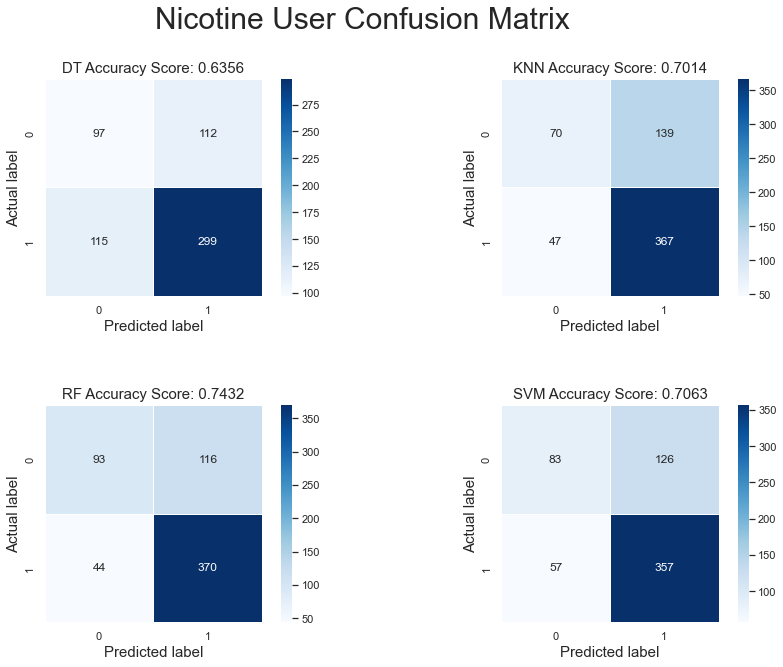

In [56]:
#Plotting Confusion matrix for all models
fig, ax =plt.subplots(2,2,figsize=(15,10))

fig.suptitle('Nicotine User Confusion Matrix', fontsize=30)

nicotine_DT_cm = confusion_matrix(y_nicotine_test, y_nicotine_DT_pred)
sns.heatmap(data=nicotine_DT_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][0])
all_sample_title = 'DT Accuracy Score: {0:.4f}'.format(nicotine_DT_classifier.score(X_nicotine_test, y_nicotine_test))
ax[0][0].set_title(all_sample_title, size = 15)

nicotine_KNN_cm = confusion_matrix(y_nicotine_test, y_nicotine_KNN_pred)
sns.heatmap(data=nicotine_KNN_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[0][1])
all_sample_title = 'KNN Accuracy Score: {0:.4f}'.format(nicotine_KNN_classifier.score(X_nicotine_test, y_nicotine_test))
ax[0][1].set_title(all_sample_title, size = 15)

nicotine_RF_cm = confusion_matrix(y_nicotine_test, y_nicotine_RF_pred)
sns.heatmap(data=nicotine_RF_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][0])
all_sample_title = 'RF Accuracy Score: {0:.4f}'.format(nicotine_RF_classifier.score(X_nicotine_test, y_nicotine_test))
ax[1][0].set_title(all_sample_title, size = 15)

nicotine_SVM_cm = confusion_matrix(y_nicotine_test, y_nicotine_SVM_pred)
sns.heatmap(data=nicotine_SVM_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g', ax=ax[1][1])
all_sample_title = 'SVM Accuracy Score: {0:.4f}'.format(nicotine_SVM_classifier.score(X_nicotine_test, y_nicotine_test))
ax[1][1].set_title(all_sample_title, size = 15)



for i in range (2):
    for j in range (2):
        ax[i][j].set_xlabel('Predicted label',fontsize = 15)
        ax[i][j].set_ylabel('Actual label',fontsize = 15)

fig.subplots_adjust(hspace=0.5)

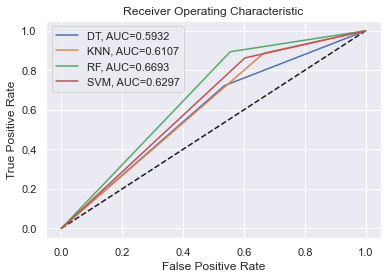

In [57]:
#Plotting ROC Curves for all models

fpr1 , tpr1, thresholds1 = roc_curve(y_nicotine_test, y_nicotine_DT_pred)
auc_nicotine_DT = round(metrics.roc_auc_score(y_nicotine_test, y_nicotine_DT_pred), 4)
fpr2 , tpr2, thresholds2 = roc_curve(y_nicotine_test, y_nicotine_KNN_pred)
auc_nicotine_KNN = round(metrics.roc_auc_score(y_nicotine_test, y_nicotine_KNN_pred), 4)
fpr3 , tpr3, thresholds3 = roc_curve(y_nicotine_test, y_nicotine_RF_pred)
auc_nicotine_RF = round(metrics.roc_auc_score(y_nicotine_test, y_nicotine_RF_pred), 4)
fpr4 , tpr4, thresholds4 = roc_curve(y_nicotine_test, y_nicotine_SVM_pred)
auc_nicotine_SVM = round(metrics.roc_auc_score(y_nicotine_test, y_nicotine_SVM_pred), 4)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "DT, AUC="+str(auc_nicotine_DT))
plt.plot(fpr2, tpr2, label= "KNN, AUC="+str(auc_nicotine_KNN))
plt.plot(fpr3, tpr3, label= "RF, AUC="+str(auc_nicotine_RF))
plt.plot(fpr4, tpr4, label= "SVM, AUC="+str(auc_nicotine_SVM))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()